<a href="https://colab.research.google.com/github/tilopez/GO_distance/blob/master/2_go_simple_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolboxes


In [0]:
!pip install pygsp

     |████████████████████████████████| 1.8MB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)

# Grafo y genes

In [0]:
ini = np.array([0, 1, 1, 2, 3, 4, 4, 6, 7,  8,  9])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

print(A)

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


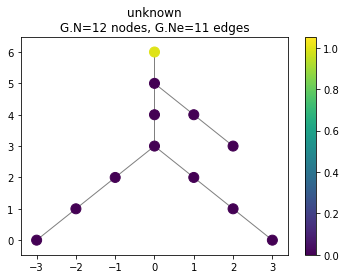

In [0]:
G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [1, 2], [-1, 2], [2, 1], [-2, 1], [3, 0], [-3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*11)))

In [0]:
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g

[1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
[1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]


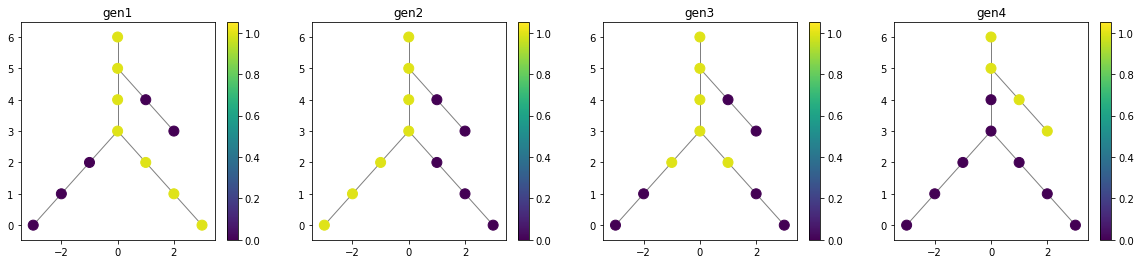

In [0]:
gen1 = labgene([0,1,2,4,6,8,10],N)
gen2 = labgene([0,1,2,4,7,9,11],N)
gen3 = labgene([0,1,2,4,6,7],N)
gen4 = labgene([0,1,3,5],N)
gen5 = labgene([0,1,2,4,6],N)
gen6 = labgene([0,1,2,4,6,8],N)

print(gen1)
print(gen2)
print(gen3)
print(gen4)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(gen1, ax=ax1, plot_name="gen1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(gen2, ax=ax1, plot_name="gen2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(gen3, ax=ax1, plot_name="gen3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(gen4, ax=ax1, plot_name="gen4")

# **Bases**

### Autovectores del laplaciano

In [0]:
autoval, autovec = np.linalg.eigh(L)
idx = autovec.argsort();
autoval = autoval[idx]
B1 = autovec[:,idx]
print(B1)

### Caminos a las hojas

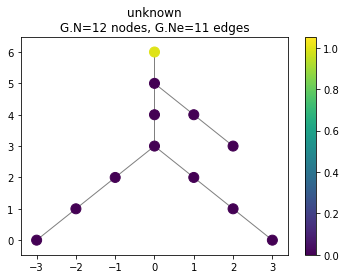

In [0]:
G.plot_signal(np.concatenate(([1],[0]*11)))

In [0]:
camino1 = labgene([0, 1, 2, 4, 6, 8, 10],N)
camino2 = labgene([0, 1, 2, 4, 7, 9, 11],N)
camino3 = labgene([0, 1, 3, 5],N)

B2 = np.column_stack((camino1, camino2, camino3)).T
print(B2)

# ordenar de menor a mayor por cantidad de nodos
d=np.sum(B2.T,axis=0)
idx=np.argsort(d)
B2=B2[idx,:]
print(B2)

# normalizar
n = np.linalg.norm(B2, axis=1, ord=1)
B2 = B2/n[:,None]
print(B2)

[[1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.]]
[[0.25       0.25       0.         0.25       0.         0.25
  0.         0.         0.         0.         0.         0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.14285714 0.         0.14285714 0.         0.14285714 0.        ]
 [0.14285714 0.14285714 0.14285714 0.         0.14285714 0.
  0.         0.14285714 0.         0.14285714 0.         0.14285714]]


### Factorización QR

In [0]:
q,r = np.linalg.qr(B2.T,mode='complete')
q1=q
q1[:,:3]=B2.T # B2 tiene solo 3 filas
B3=q1.T
print(B3)

[[ 0.25        0.25        0.          0.25        0.          0.25
   0.          0.          0.          0.          0.          0.        ]
 [ 0.14285714  0.14285714  0.14285714  0.          0.14285714  0.
   0.14285714  0.          0.14285714  0.          0.14285714  0.        ]
 [ 0.14285714  0.14285714  0.14285714  0.          0.14285714  0.
   0.          0.14285714  0.          0.14285714  0.          0.14285714]
 [-0.54520292  0.05266703  0.22254434  0.74626795  0.10799662 -0.25373205
   0.05399831  0.05399831  0.05399831  0.05399831  0.05399831  0.05399831]
 [ 0.06780438 -0.32900054 -0.33381651  0.13059808  0.83800507  0.13059808
  -0.08099747 -0.08099747 -0.08099747 -0.08099747 -0.08099747 -0.08099747]
 [-0.54520292  0.05266703  0.22254434 -0.25373205  0.10799662  0.74626795
   0.05399831  0.05399831  0.05399831  0.05399831  0.05399831  0.05399831]
 [ 0.15532323 -0.42853733  0.09133652  0.13660705 -0.12724896  0.13660705
   0.76970885  0.10304218 -0.23029115  0.10304218 -0.2

# Pruebas

In [0]:
dist_B1 = np.zeros((6,6))
dist_B2 = np.zeros((6,6))
dist_B3 = np.zeros((6,6))
genes = np.column_stack((gen1, gen2, gen3, gen4, gen5, gen6)).T

N = 0 #@param {type:"slider", min:0, max:11, step:1}
ggf1 = np.dot(B1[:,-N:].T, genes.T).T
for i in range(6):
  for j in range(i,6):
    dist_B1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])

ggf2 = np.dot(B2, genes.T).T
for i in range(6):
  for j in range(i,6):
    dist_B2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])

ggf3 = np.dot(B3.T, genes.T).T
for i in range(6):
  for j in range(i,6):
    dist_B3[i,j] = np.linalg.norm(ggf3[i,:]-ggf3[j,:])

dist_B1 = dist_B1 + dist_B1.T
dist_B2 = dist_B2 + dist_B2.T
dist_B3 = dist_B3 + dist_B3.T

print(dist_B1)
print(dist_B2)
print(dist_B3)

[[0.         8.48528137 6.         9.16515139 4.89897949 3.46410162]
 [8.48528137 0.         6.         9.16515139 6.92820323 7.74596669]
 [6.         6.         0.         8.48528137 3.46410162 4.89897949]
 [9.16515139 9.16515139 8.48528137 0.         7.74596669 8.48528137]
 [4.89897949 6.92820323 3.46410162 7.74596669 0.         3.46410162]
 [3.46410162 7.74596669 4.89897949 8.48528137 3.46410162 0.        ]]
[[0.         0.60609153 0.31943828 0.91751661 0.28571429 0.14285714]
 [0.60609153 0.         0.31943828 0.91751661 0.45175395 0.51507875]
 [0.31943828 0.31943828 0.         0.78571429 0.14285714 0.20203051]
 [0.91751661 0.91751661 0.78571429 0.         0.71784826 0.81127262]
 [0.28571429 0.45175395 0.14285714 0.71784826 0.         0.14285714]
 [0.14285714 0.51507875 0.20203051 0.81127262 0.14285714 0.        ]]
[[0.         2.44948974 1.73205081 2.4784788  1.41421356 1.        ]
 [2.44948974 0.         1.73205081 2.4784788  2.         2.23606798]
 [1.73205081 1.73205081 0.      


 Autovectores del Laplaciano
          Gen 1     Gen 2     Gen 3     Gen 4     Gen 5     Gen 6
Gen 1  0.000000  8.485281  6.000000  9.165151  4.898979  3.464102
Gen 2  8.485281  0.000000  6.000000  9.165151  6.928203  7.745967
Gen 3  6.000000  6.000000  0.000000  8.485281  3.464102  4.898979
Gen 4  9.165151  9.165151  8.485281  0.000000  7.745967  8.485281
Gen 5  4.898979  6.928203  3.464102  7.745967  0.000000  3.464102
Gen 6  3.464102  7.745967  4.898979  8.485281  3.464102  0.000000

 Base Propia
          Gen 1     Gen 2     Gen 3     Gen 4     Gen 5     Gen 6
Gen 1  0.000000  0.606092  0.319438  0.917517  0.285714  0.142857
Gen 2  0.606092  0.000000  0.319438  0.917517  0.451754  0.515079
Gen 3  0.319438  0.319438  0.000000  0.785714  0.142857  0.202031
Gen 4  0.917517  0.917517  0.785714  0.000000  0.717848  0.811273
Gen 5  0.285714  0.451754  0.142857  0.717848  0.000000  0.142857
Gen 6  0.142857  0.515079  0.202031  0.811273  0.142857  0.000000

 Factorización QR de la Base Pr

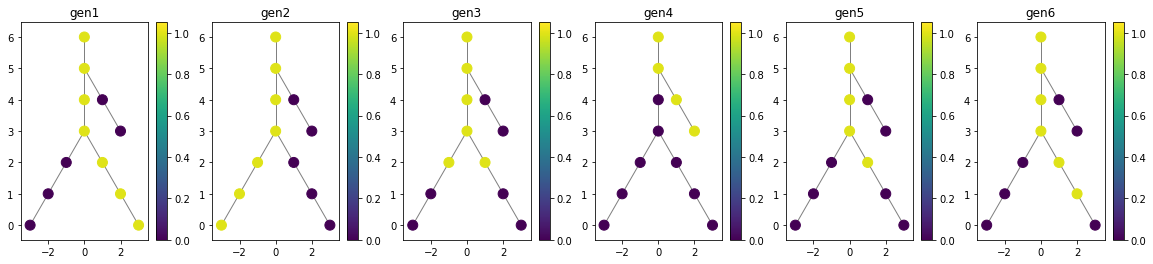

In [0]:
names = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6']

print("\n Autovectores del Laplaciano")
frame1 = pd.DataFrame(dist_B1, names, names)
print(frame1) 

print("\n Base Propia")
frame2 = pd.DataFrame(dist_B2, names, names)
print(frame2) 

print("\n Factorización QR de la Base Propia")
frame3 = pd.DataFrame(dist_B3, names, names)
print(frame3) 

fig, ax = plt.subplots(1, 6, figsize=(20,4))

ax1 = plt.subplot(1, 6, 1);     G.plot_signal(gen1, ax=ax1, plot_name="gen1")
ax1 = plt.subplot(1, 6, 2);     G.plot_signal(gen2, ax=ax1, plot_name="gen2")
ax1 = plt.subplot(1, 6, 3);     G.plot_signal(gen3, ax=ax1, plot_name="gen3")
ax1 = plt.subplot(1, 6, 4);     G.plot_signal(gen4, ax=ax1, plot_name="gen4")
ax1 = plt.subplot(1, 6, 5);     G.plot_signal(gen5, ax=ax1, plot_name="gen5")
ax1 = plt.subplot(1, 6, 6);     G.plot_signal(gen6, ax=ax1, plot_name="gen6")

# Prueba matriz expectativa

In [0]:
def exp_matrix( dist, exp ):
  dist = dist.round(8)
  rta = np.zeros(exp.shape)
  [n,m] = exp.shape

  for i in range(n):
    fila_dist = np.concatenate((dist[i,0:i],dist[i,i+1:n]))
    comps = np.zeros(m)
    cont = 0
    for j in range(n-2):
      for k in range(j+1,n-1):
        comps[cont] = 0 if fila_dist[j] < fila_dist[k] else 1 if fila_dist[j] == fila_dist[k] else 2
        cont = cont + 1
    rta[i,:] = comps

  eva = []

  for i in range(n):
    word = []
    for j in range(m):
      if rta[i,j] == exp[i,j]:
        word.append("right")
      else:
        word.append("WRONG")
    eva.append(word)

  return(eva)

[[2. 0. 2. 2. 0. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 0. 0. 0. 2. 2. 0.]
 [1. 0. 2. 2. 0. 2. 2. 2. 2. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 0. 0.]
 [0. 2. 0. 2. 2. 0. 2. 0. 2. 2.]
 [0. 0. 0. 2. 2. 0. 2. 0. 2. 2.]]


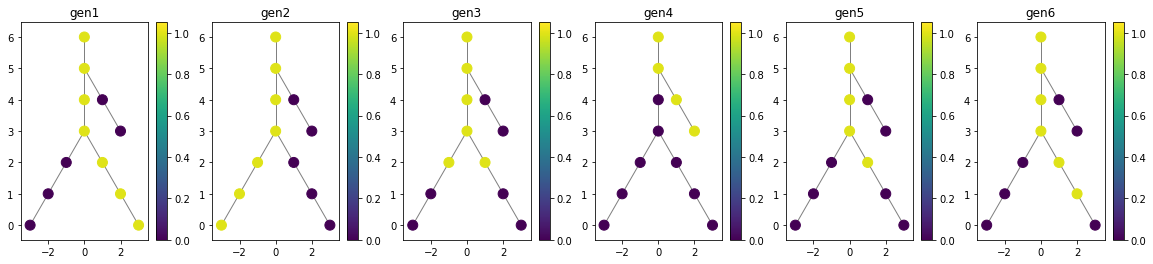

In [0]:
n = 6
m = 0
for i in range(2,n):
  m = m + n - i

exp = np.zeros((n,m))

exp[0,0] = 2
exp[0,1] = 0
exp[0,2] = 2
exp[0,3] = 2
exp[0,4] = 0
exp[0,5] = 2
exp[0,6] = 2
exp[0,7] = 2
exp[0,8] = 2
exp[0,9] = 2

exp[1,0] = 2
exp[1,1] = 2
exp[1,2] = 2
exp[1,3] = 2
exp[1,4] = 0
exp[1,5] = 0
exp[1,6] = 0
exp[1,7] = 2
exp[1,8] = 2
exp[1,9] = 0

exp[2,0] = 1
exp[2,1] = 0 # dist31 vs dist34 : menor distancia a mayor cantidad de nodos en comun
exp[2,2] = 2
exp[2,3] = 2
exp[2,4] = 0
exp[2,5] = 2
exp[2,6] = 2
exp[2,7] = 2
exp[2,8] = 2
exp[2,9] = 0

exp[3,0] = 1
exp[3,1] = 2
exp[3,2] = 2
exp[3,3] = 2
exp[3,4] = 2
exp[3,5] = 2
exp[3,6] = 2
exp[3,7] = 2
exp[3,8] = 0
exp[3,9] = 0

exp[4,0] = 0
exp[4,1] = 2
exp[4,2] = 0
exp[4,3] = 2
exp[4,4] = 2
exp[4,5] = 0
exp[4,6] = 2
exp[4,7] = 0
exp[4,8] = 2
exp[4,9] = 2

exp[5,0] = 0
exp[5,1] = 0
exp[5,2] = 0
exp[5,3] = 2
exp[5,4] = 2
exp[5,5] = 0
exp[5,6] = 2
exp[5,7] = 0
exp[5,8] = 2
exp[5,9] = 2

print(exp)

fig, ax = plt.subplots(1, 6, figsize=(20,4))

ax1 = plt.subplot(1, 6, 1);     G.plot_signal(gen1, ax=ax1, plot_name="gen1")
ax1 = plt.subplot(1, 6, 2);     G.plot_signal(gen2, ax=ax1, plot_name="gen2")
ax1 = plt.subplot(1, 6, 3);     G.plot_signal(gen3, ax=ax1, plot_name="gen3")
ax1 = plt.subplot(1, 6, 4);     G.plot_signal(gen4, ax=ax1, plot_name="gen4")
ax1 = plt.subplot(1, 6, 5);     G.plot_signal(gen5, ax=ax1, plot_name="gen5")
ax1 = plt.subplot(1, 6, 6);     G.plot_signal(gen6, ax=ax1, plot_name="gen6")

In [0]:
exps=exp_matrix(dist_B2,exp)
for i in exps:
  print(i)

['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'WRONG', 'right']
['right', 'right', 'right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right']


### Análisis de casos errados

21 vs 24 :
Esperaba que 21 sea mayor porque compartía mayor cantidad de nodos en común. Terminó siendo menor, este puede deberse a que tienen menos nodos de diferencia.

53 vs 56 :
Esperaba que sea mayor porque 5 y 6 comparten más nodos. En este caso la cantidad de nodos que no tienen en común es la misma, pero tiene menor distancia el que tiene un nodo extra de menor profundidad.

61 vs 65 :
Esperaba que 61 sea mayor porque tiene el nodo de diferencia se encuentra a mayor profundidad, en las distancias se observa que son iguales.